In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import wrangle_mall
import env
import matplotlib.pyplot as plt

**Exercise 1**

Acquire data from the cloud database.

You will want to end with a single dataframe. Include the logerror field and all other fields related to the properties that are available. You will end up using all the tables in the database.

Be sure to do the correct join (inner, outer, etc.). We do not want to eliminate properties purely because they may have a null value for airconditioningtypeid. - Only include properties with a transaction in 2017, and include only the last transaction for each property (so no duplicate property ID's), along with zestimate error and date of transaction. (Hint: read the docs for the .duplicated method) - Only include properties that have a latitude and longitude value.


In [2]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/zillow'
sql = """ select bedroomcnt, bathroomcnt,
calculatedfinishedsquarefeet, fips, lotsizesquarefeet,
 taxvaluedollarcnt, yearbuilt, taxamount
 from properties_2017 limit 15000 """

In [3]:
df = pd.read_sql(sql, url)

In [4]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
0,0.0,0.0,NaN,6037.0,85768.0,9.0,NaN,NaN
1,0.0,0.0,NaN,6037.0,4083.0,27516.0,NaN,NaN
2,0.0,0.0,73026.0,6037.0,63085.0,1434941.0,1959.0,20800.37
3,0.0,0.0,5068.0,6037.0,7521.0,1174475.0,1948.0,14557.57
4,0.0,0.0,1776.0,6037.0,8512.0,440101.0,1947.0,5725.17


**Exercise 2**

Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [5]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
count,15000.000000,15000.000000,14764.000000,15000.000000,1.359700e+04,1.479500e+04,14748.000000,1.488400e+04
mean,3.059667,2.201433,1845.770523,6047.798000,2.318511e+04,4.461879e+05,1964.395579,5.449406e+03
std,1.303260,1.112890,1404.712289,19.995939,1.222551e+05,8.802470e+05,23.837943,1.264175e+04
min,0.000000,0.000000,99.000000,6037.000000,1.800000e+02,9.000000e+00,1885.000000,1.335000e+01
25%,2.000000,2.000000,1210.000000,6037.000000,5.626000e+03,1.854465e+05,1950.000000,2.436310e+03
50%,3.000000,2.000000,1578.000000,6037.000000,6.985000e+03,3.190000e+05,1963.000000,3.977680e+03
75%,4.000000,3.000000,2155.000000,6059.000000,9.834000e+03,5.119530e+05,1982.000000,6.181058e+03
max,12.000000,12.000000,73026.000000,6111.000000,6.971010e+06,6.750649e+07,2016.000000,1.195296e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    15000 non-null  float64
 1   bathroomcnt                   15000 non-null  float64
 2   calculatedfinishedsquarefeet  14764 non-null  float64
 3   fips                          15000 non-null  float64
 4   lotsizesquarefeet             13597 non-null  float64
 5   taxvaluedollarcnt             14795 non-null  float64
 6   yearbuilt                     14748 non-null  float64
 7   taxamount                     14884 non-null  float64
dtypes: float64(8)
memory usage: 937.6 KB


In [7]:
df.isna().sum()

bedroomcnt                         0
bathroomcnt                        0
calculatedfinishedsquarefeet     236
fips                               0
lotsizesquarefeet               1403
taxvaluedollarcnt                205
yearbuilt                        252
taxamount                        116
dtype: int64

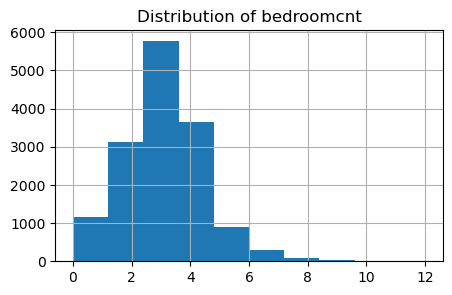

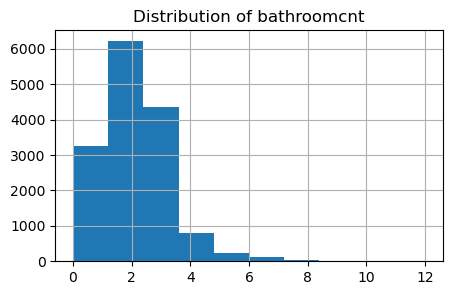

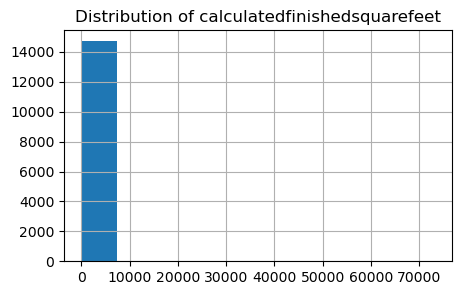

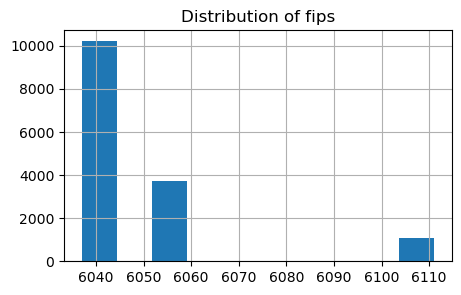

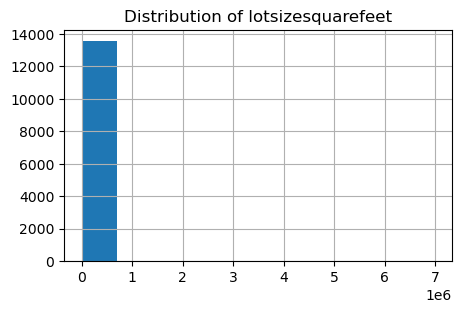

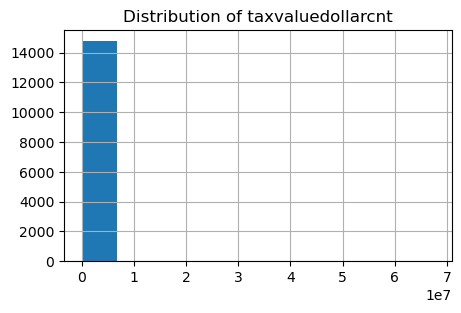

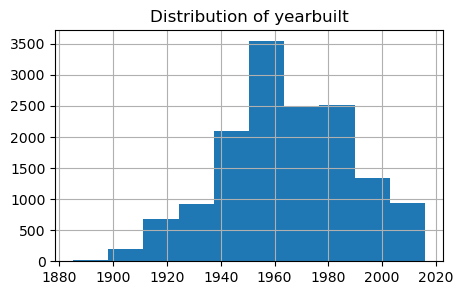

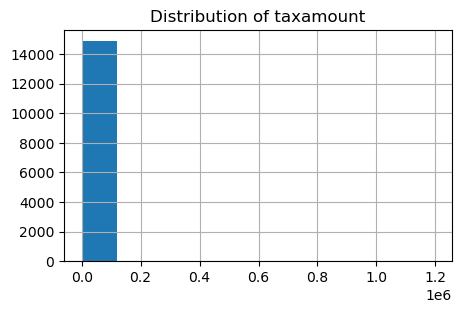

In [8]:
 for col in df.columns:
    plt.figure(figsize= (5,3))
    df[col].hist()
    plt.title(f'Distribution of {col}')
    plt.show()

**Prepare**

Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer.

In [9]:
df.isna().sum()

bedroomcnt                         0
bathroomcnt                        0
calculatedfinishedsquarefeet     236
fips                               0
lotsizesquarefeet               1403
taxvaluedollarcnt                205
yearbuilt                        252
taxamount                        116
dtype: int64

In [10]:
# I'm going to ise describe( to see the quartiles for bedroom counts. I think anything above the 75% probably
# isn't a single unit property)
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
count,15000.000000,15000.000000,14764.000000,15000.000000,1.359700e+04,1.479500e+04,14748.000000,1.488400e+04
mean,3.059667,2.201433,1845.770523,6047.798000,2.318511e+04,4.461879e+05,1964.395579,5.449406e+03
std,1.303260,1.112890,1404.712289,19.995939,1.222551e+05,8.802470e+05,23.837943,1.264175e+04
min,0.000000,0.000000,99.000000,6037.000000,1.800000e+02,9.000000e+00,1885.000000,1.335000e+01
25%,2.000000,2.000000,1210.000000,6037.000000,5.626000e+03,1.854465e+05,1950.000000,2.436310e+03
50%,3.000000,2.000000,1578.000000,6037.000000,6.985000e+03,3.190000e+05,1963.000000,3.977680e+03
75%,4.000000,3.000000,2155.000000,6059.000000,9.834000e+03,5.119530e+05,1982.000000,6.181058e+03
max,12.000000,12.000000,73026.000000,6111.000000,6.971010e+06,6.750649e+07,2016.000000,1.195296e+06


In [11]:

for col in df.columns:
# setting floor for my data 
    Q1 = df[col].quantile(0.25)
# setting ceiling for my data
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    floor = Q1 - 1.5 * IQR
    ceiling = Q3 + 1.5 * IQR
    df = df.loc[(df[col] >= floor) & (df[col] <= ceiling)]

In [12]:
df.describe()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,fips,lotsizesquarefeet,taxvaluedollarcnt,yearbuilt,taxamount
count,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000,9011.000000
mean,3.193541,2.070303,1623.779159,6042.551881,6693.343580,318015.687937,1958.043058,3991.615287
std,0.902608,0.743765,555.232605,9.556575,2293.052103,191046.041393,20.287920,2155.065292
min,0.000000,1.000000,342.000000,6037.000000,485.000000,15270.000000,1911.000000,20.240000
25%,3.000000,2.000000,1210.000000,6037.000000,5395.000000,169217.000000,1948.000000,2360.340000
50%,3.000000,2.000000,1536.000000,6037.000000,6420.000000,290206.000000,1956.000000,3718.780000
75%,4.000000,2.500000,1951.500000,6059.000000,7650.000000,438338.000000,1971.000000,5379.505000
max,7.000000,4.500000,3388.000000,6059.000000,14904.000000,913725.000000,2007.000000,10078.320000


**Exercise 2.2**

Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row)

In [13]:
df.isna().sum()

bedroomcnt                      0
bathroomcnt                     0
calculatedfinishedsquarefeet    0
fips                            0
lotsizesquarefeet               0
taxvaluedollarcnt               0
yearbuilt                       0
taxamount                       0
dtype: int64

In [14]:
df = df.dropna()
df = df.rename(columns= {'bedroomcnt': 'beds', 'bathroomcnt':'baths',
                        'taxamount':'tax_amt', 'lotsizesquarefeet':'lot_size',
                        'calculatedfinishedsquarefeet':'sq_ft',
                        'taxvaluedollarcnt':'tax_val','yearbuilt':'year',
                        })
    

In [15]:
df.head()

,beds,baths,sq_ft,fips,lot_size,tax_val,year,tax_amt
33,3.0,2.0,2077.0,6037.0,6490.0,646760.0,1926.0,7924.68
45,4.0,2.0,1931.0,6037.0,5420.0,224617.0,1957.0,2885.93
75,4.0,4.0,3086.0,6037.0,12843.0,820065.0,1950.0,9602.77
110,3.0,1.0,1244.0,6037.0,6021.0,169471.0,1950.0,2532.88
111,3.0,2.0,1300.0,6037.0,4917.0,233266.0,1950.0,3110.99


In [16]:
# df = df.drop_duplicates(inplace=True)



In [17]:
df.head()

,beds,baths,sq_ft,fips,lot_size,tax_val,year,tax_amt
33,3.0,2.0,2077.0,6037.0,6490.0,646760.0,1926.0,7924.68
45,4.0,2.0,1931.0,6037.0,5420.0,224617.0,1957.0,2885.93
75,4.0,4.0,3086.0,6037.0,12843.0,820065.0,1950.0,9602.77
110,3.0,1.0,1244.0,6037.0,6021.0,169471.0,1950.0,2532.88
111,3.0,2.0,1300.0,6037.0,4917.0,233266.0,1950.0,3110.99


In [18]:
def prep_zillow(df):
    """ This function prepares/cleans data from the zillow df for splitting"""
    
    # Drops null values from columns
    df= df.dropna()
    
    #Renames columns to something more visual appealing
    df = df.rename(columns= {'bedroomcnt': 'beds', 'bathroomcnt':'baths',
                        'taxamount':'tax_amt', 'lotsizesquarefeet':'lot_size',
                        'calculatedfinishedsquarefeet':'sq_ft',
                        'taxvaluedollarcnt':'tax_val','yearbuilt':'year',
                        })
    
    # Drops duplicate values from df
    # df = df.drop_duplicates(inplace=True)
    
    return df